In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

import os
import re
import numpy as np
from collections import defaultdict

models_names = ['GoogLeNetda', 'MobileNetV2da', 'SENet18da']
colors = ['r', 'b', 'g', 'm', 'y', 'k']

In [10]:
listfile = defaultdict(lambda :defaultdict(list))
for filename in os.listdir('Results/'):
    
    if filename.startswith("Data_") and 'nomomentum' in filename:# or 'sqrtmomentum' in filename):# and 'K3' in filename:
        fnsplit = filename.split('_') 
        mname = fnsplit[1]
           
        if 'sqrtmomentum' in filename:
            details = '_'.join(fnsplit[2:8])
            listfile[mname][details].append('Results/'+filename)
        elif 'mLR' in filename:
            details = '_'.join(fnsplit[2:7])
            listfile[mname][details].append('Results/'+filename)
        #elif not ('nomomentum' in filename) and 'K3' in filename:
        else:
            details = '_'.join(fnsplit[2:5])
            listfile[mname][details].append('Results/'+filename)

In [11]:
listfile.keys()

dict_keys(['SENet18da', 'GoogLeNetda', 'MobileNetV2da'])

In [19]:
mymodel = 'MobileNetV2da'
bigdict = {}
for model in listfile.keys():
    dictmetrics = defaultdict(list)
    for mname, flist in listfile[model].items():
        for fname in flist:
            dictmetrics[mname].append(defaultdict(list))
            with open(fname, 'r') as f:
                next(f)
                for l in f:
                    _, t, ltrain, atrain, _, _, ltest, atest = [float(x) for x in l.split()]
                    dictmetrics[mname][-1]['t'].append(t)
                    dictmetrics[mname][-1]['ltrain'].append(ltrain)
                    dictmetrics[mname][-1]['atrain'].append(atrain)
                    dictmetrics[mname][-1]['ltest'].append(ltest)
                    dictmetrics[mname][-1]['atest'].append(atest)
    bigdict[model] = dictmetrics
dictmetrics = bigdict[mymodel]


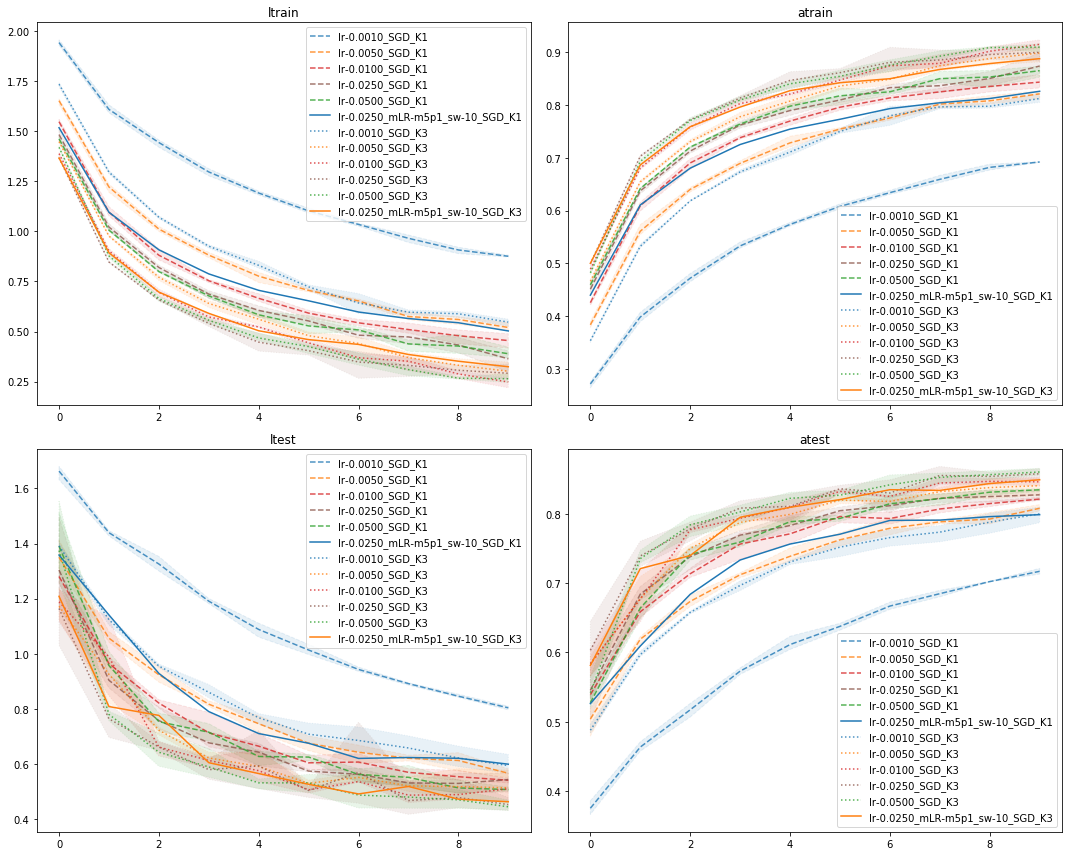

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(15.,12.))
from itertools import chain
for title, ax in zip(["ltrain", "atrain", "ltest", "atest"], axes.flat):
    ax.set_title(title)
    lrcolordict = dict((lr, 'C'+str(i)) for (i,lr) in enumerate(['0.0010', '0.0050', '0.0500', '0.0100', '0.1000', '0.0250']))
    lrcolordict['mLR'] = 'k'
    for m in sorted(dictmetrics.keys(), key=lambda k: k.split('_')[::-1]):
        metlist = [[] for _ in range(max(len(exp[title]) for exp in dictmetrics[m]))]
        for exp in dictmetrics[m]:
            for i, x in enumerate(exp[title]):
                metlist[i].append(x)
        metlist = [sorted(ep) for ep in metlist]
        mean = [sum(ep) / len(ep) for ep in metlist]
        mini = [ep[0] for ep in metlist]
        maxi = [ep[-1] for ep in metlist]
        
        if 'mLR' in m:
            if  'mom' in m:
                
                linestyle = '--'
                #lr = 'mLR'
            else:
                linestyle = '-'
            ax.plot(mean, label=m, linestyle=linestyle)
            #ax.fill_between(list(range(len(mean))), mini, y2=maxi, linestyle=linestyle, alpha=0.1, color=lrcolordict[lr])
        else:
            if 'K1' in m:
                linestyle = '--'
                alpha = 0.8
            else:
                linestyle = ':'
                alpha = 0.8
            lr, K, _ = m.split('_')
            lr = lr.split('-')[1]
            ax.plot(mean, label=m, linestyle=linestyle, color=lrcolordict[lr], alpha=alpha)
            ax.fill_between(list(range(len(mean))), mini, y2=maxi, linestyle=linestyle, alpha=0.1, color=lrcolordict[lr])
            
#         elif 'nomomentum' in m:
#             lr, K, _ = m.split('_')
#             if K == "K3":
#                 linestyle = ':'
#             else:
#                 linestyle = '--'
#             lr = lr.split('-')[1]
#             ax.plot(mean, label=m, linestyle=linestyle, color=lrcolordict[lr])
#             ax.fill_between(list(range(len(mean))), mini, y2=maxi, linestyle=linestyle, alpha=0.1, color=lrcolordict[lr])
#         else:
#             lr, K = m.split('_')
#             lr = lr.split('-')[1]
            
#             if K == "K3":
#                 linestyle = ':'
#             else:
#                 linestyle = '--'
        
        
    ax.legend()
plt.tight_layout()
plt.show()


In [ ]:
%debug

In [ ]:
fig, axes = plt.subplots(len(dictmetrics) // 2, 2, figsize=(15.,12.))
from itertools import chain

for m, ax in zip(dictmetrics.keys(), axes.flat):
    for title, c in zip(["ltrain", "ltest"], ['r', 'b']):
        ax.set_title(m)
        metlist = [[] for _ in range(max(len(exp[title]) for exp in dictmetrics[m]))]
        for exp in dictmetrics[m]:
            for i, x in enumerate(exp[title]):
                metlist[i].append(x)
        metlist = [sorted(ep) for ep in metlist]
        mean = [sum(ep) / len(ep) for ep in metlist]
        mini = [ep[0] for ep in metlist]
        maxi = [ep[-1] for ep in metlist]
        
        ax.plot(mean, c, label=title)
        ax.fill_between(list(range(len(mean))), mini, y2=maxi, color=c, linestyle='-', alpha=0.1)
        ax.legend()
plt.tight_layout()
plt.show()


In [2]:
listfile = defaultdict(lambda :defaultdict(list))
for filename in os.listdir('Results/'):
    
    if filename.startswith("Data_") and 'sqrtmomentum' in filename:
        fnsplit = filename.split('_')
        mname = fnsplit[1]
            
        if 'mLR' in filename:
            details = '_'.join(fnsplit[2:7])
            listfile[mname][details].append('Results/'+filename)
        else:
            details = '_'.join(fnsplit[2:5])
            listfile[mname][details].append('Results/'+filename)

In [3]:
listfile.keys()

dict_keys(['MobileNetV2da', 'SENet18da', 'GoogLeNetda'])

In [4]:
mymodel = 'GoogLeNetda'
bigdict = {}
for model in listfile.keys():
    dictmetrics = defaultdict(list)
    for mname, flist in listfile[model].items():
        for fname in flist:
            dictmetrics[mname].append(defaultdict(list))
            with open(fname, 'r') as f:
                next(f)
                for l in f:
                    _, t, ltrain, atrain, _, _, ltest, atest = [float(x) for x in l.split()]
                    dictmetrics[mname][-1]['t'].append(t)
                    dictmetrics[mname][-1]['ltrain'].append(ltrain)
                    dictmetrics[mname][-1]['atrain'].append(atrain)
                    dictmetrics[mname][-1]['ltest'].append(ltest)
                    dictmetrics[mname][-1]['atest'].append(atest)
    bigdict[model] = dictmetrics
dictmetrics = bigdict[mymodel]


ValueError: not enough values to unpack (expected 3, got 2)

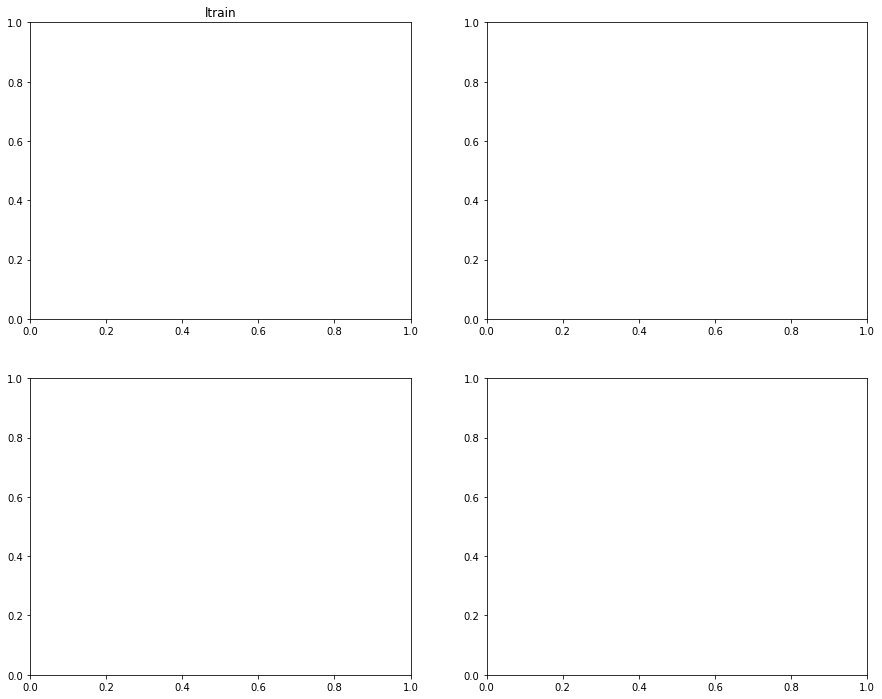

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(15.,12.))
from itertools import chain
for title, ax in zip(["ltrain", "atrain", "ltest", "atest"], axes.flat):
    ax.set_title(title)
    lrcolordict = dict((lr, 'C'+str(i)) for (i,lr) in enumerate(['0.0010', '0.0050', '0.0500', '0.0100', '0.1000', '0.0250']))
    lrcolordict['mLR'] = 'k'
    for m in sorted(dictmetrics.keys(), key=lambda k: k.split('_')[::-1]):
        metlist = [[] for _ in range(max(len(exp[title]) for exp in dictmetrics[m]))]
        for exp in dictmetrics[m]:
            for i, x in enumerate(exp[title]):
                metlist[i].append(x)
        metlist = [sorted(ep) for ep in metlist]
        mean = [sum(ep) / len(ep) for ep in metlist]
        mini = [ep[0] for ep in metlist]
        maxi = [ep[-1] for ep in metlist]
        
        if 'mLR' in m:
            linestyle = '-'
            lr = 'mLR'
            ax.plot(mean, label=m, linestyle=linestyle)
            #ax.fill_between(list(range(len(mean))), mini, y2=maxi, linestyle=linestyle, alpha=0.1, color=lrcolordict[lr])
        else:
            if 'K1' in m:
                linestyle = '--'
                alpha = 0.8
            else:
                linestyle = ':'
                alpha = 0.5
            lr, K, _ = m.split('_')
            lr = lr.split('-')[1]
            ax.plot(mean, label=m, linestyle=linestyle, color=lrcolordict[lr], alpha=0.3)
            #ax.fill_between(list(range(len(mean))), mini, y2=maxi, linestyle=linestyle, alpha=0.1, color=lrcolordict[lr])
            
#         elif 'nomomentum' in m:
#             lr, K, _ = m.split('_')
#             if K == "K3":
#                 linestyle = ':'
#             else:
#                 linestyle = '--'
#             lr = lr.split('-')[1]
#             ax.plot(mean, label=m, linestyle=linestyle, color=lrcolordict[lr])
#             ax.fill_between(list(range(len(mean))), mini, y2=maxi, linestyle=linestyle, alpha=0.1, color=lrcolordict[lr])
#         else:
#             lr, K = m.split('_')
#             lr = lr.split('-')[1]
            
#             if K == "K3":
#                 linestyle = ':'
#             else:
#                 linestyle = '--'
        
        
    ax.legend()
plt.tight_layout()
plt.show()


In [34]:
listfile = defaultdict(lambda :defaultdict(list))
mymodel = ['GoogLeNet', 'MobileNetV2', 'SENet18'][0]
for filename in os.listdir('Results/'):
    #if re.match('Data_da*{}*K1*es*nomomentum*'.format(mymodel), filename):
    if re.match('Data_da.*K1.*es.*nomomentum*'.format(mymodel), filename):
        fnsplit = filename.split('_')            
        if 'mLR' in filename:
            _, _, modelname, _, minmax, _, _, _, _, _, _ = fnsplit
            details = minmax
        else:
            _, _, modelname, lr,_, _, _, _, _ = fnsplit
            details = lr
        print(details)
        listfile[modelname][details].append('Results/'+filename)




bigdict = {}
for model in listfile.keys():
    dictmetrics = defaultdict(list)
    for mname, flist in listfile[model].items():
        for fname in flist:
            dictmetrics[mname].append(defaultdict(list))
            with open(fname, 'r') as f:
                next(f)
                for l in f:
                    _, t, ltrain, atrain, _, _, ltest, atest = [float(x) for x in l.split()]
                    dictmetrics[mname][-1]['t'].append(t)
                    dictmetrics[mname][-1]['ltrain'].append(ltrain)
                    dictmetrics[mname][-1]['atrain'].append(atrain)
                    dictmetrics[mname][-1]['ltest'].append(ltest)
                    dictmetrics[mname][-1]['atest'].append(atest)
    bigdict[model] = dictmetrics
dictmetrics = bigdict[mymodel]

mLR-m5p0
lr-1.0e+00
mLR-m4m4
mLR-m4m2
mLR-m5m2
mLR-m3m3
lr-1.0e-03
mLR-m3m2
mLR-m3m1
lr-1.0e-04
mLR-m2p0
mLR-m5m1
mLR-m5m5
lr-1.0e-02
mLR-m5m4
lr-1.0e-01
mLR-m4m1
lr-1.0e-05
mLR-m3p0
mLR-m2m2
mLR-m4p0
mLR-m2m1
mLR-p0p0
mLR-m4m3
mLR-m1m1
mLR-m5m3
mLR-m1p0


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


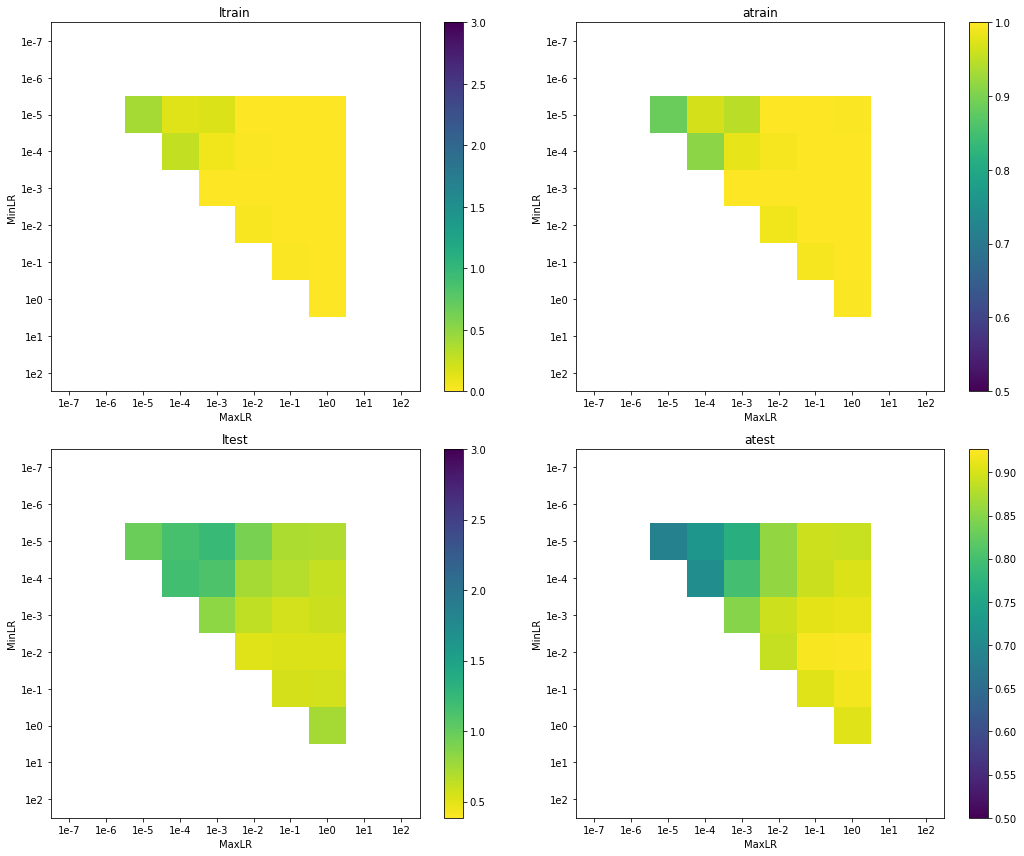

In [39]:
figep = 1000


fig, axes = plt.subplots(2, 2, figsize=(15.,12.))
from itertools import chain
for title, ax in zip(["ltrain", "atrain", "ltest", "atest"], axes.flat):
    allmet = []
    op = min if title[0] == 'l' else max
    minmax = op(sum(op(exp[title]) for exp in metlist) / len(metlist) for metlist in dictmetrics.values())
    cmap = 'viridis'
    if title[0] == 'l':
        cmap += '_r'
        vmin, vmax = minmax, 3.
    else:
        vmin, vmax = .5, minmax
    
    
    ax.set_title(title)
    met2d = np.zeros((10,10))
    met2d[:,:] = None
    for m in dictmetrics.keys():
        if 'mLR' in m:
            mlr = m.split('-')[1]
            minlr, maxlr = int(mlr[1]), int(mlr[3])
            minlr *= (1 if mlr[0] == 'p' else -1)
            maxlr *= (1 if mlr[2] == 'p' else -1)
            if minlr == maxlr:
                continue
        else:
            minlr = maxlr = int(np.log10(float(m[3:])))        
        metlist = [exp[title][min(len(exp[title])-1, figep)] for exp in dictmetrics[m]]
        met2d[minlr+7,maxlr+7] = sum(metlist) / len(metlist)
        
    
    im = ax.imshow(np.clip(met2d,0., 3.), cmap=cmap, vmin=vmin, vmax=vmax)
    ax.set_xticks(np.arange(10))
    ax.set_yticks(np.arange(10))
    ax.set_xticklabels(['1e{}'.format(x-7) for x in range(10)])
    ax.set_yticklabels(['1e{}'.format(x-7) for x in range(10)])
    ax.set_xlabel('MaxLR')
    ax.set_ylabel('MinLR')

    fig.colorbar(im, ax=ax)
    
    ax.legend()
    
plt.tight_layout()
plt.show()

In [30]:
%debug

> <ipython-input-29-228f87017e8a>(30)<module>()
     28                 continue
     29         else:
---> 30             lr = int(10 ** float(m.split('-')[1]))
     31 
     32         metlist = [exp[title][min(len(exp[title])-1, figep)] for exp in dictmetrics[m]]

ipdb> m
'lr-1.0e-04'
ipdb> q


In [6]:
listfile = defaultdict(lambda :defaultdict(list))
for filename in os.listdir('.'):
    
    if filename.startswith("Data_") and 'nomomentum' in filename and 'K1' in filename and:
        fnsplit = filename.split('_') 
        mname = fnsplit[2]
           
        if 'mLR' in filename:
            details = '_'.join((fnsplit[3][4:],fnsplit[6]))
            listfile[mname][details].append(filename)
        #elif not ('nomomentum' in filename) and 'K3' in filename:
        else:
            pass
            #details = '_'.join(fnsplit[2:5])
            #listfile[mname][details].append('Results/'+filename)



mymodel = ['GoogLeNet', 'MobileNetV2', 'SENet18'][0]
bigdict = {}
for model in listfile.keys():
    dictmetrics = defaultdict(list)
    for mname, flist in listfile[model].items():
        for fname in flist:
            dictmetrics[mname].append(defaultdict(list))
            with open(fname, 'r') as f:
                next(f)
                for l in f:
                    _, t, ltrain, atrain, _, _, ltest, atest = [float(x) for x in l.split()]
                    dictmetrics[mname][-1]['t'].append(t)
                    dictmetrics[mname][-1]['ltrain'].append(ltrain)
                    dictmetrics[mname][-1]['atrain'].append(atrain)
                    dictmetrics[mname][-1]['ltest'].append(ltest)
                    dictmetrics[mname][-1]['atest'].append(atest)
    bigdict[model] = dictmetrics
dictmetrics = bigdict[mymodel]

In [8]:
listfile

defaultdict(<function __main__.<lambda>>,
            {'GoogLeNet': defaultdict(list,
                         {'.5e-02_SGD': ['Data_da_GoogLeNet_lr-2.5e-02_mLR-m5p0_sw-10_SGD_K1_es_exp-0_nomomentum.txt',
                           'Data_da_GoogLeNet_lr-2.5e-02_mLR-m4m4_sw-10_SGD_K1_es_exp-0_nomomentum.txt',
                           'Data_da_GoogLeNet_lr-2.5e-02_mLR-m4m2_sw-10_SGD_K1_es_exp-0_nomomentum.txt',
                           'Data_da_GoogLeNet_lr-2.5e-02_mLR-m5m2_sw-10_SGD_K1_es_exp-0_nomomentum.txt',
                           'Data_da_GoogLeNet_lr-2.5e-02_mLR-m3m3_sw-10_SGD_K1_es_exp-0_nomomentum.txt',
                           'Data_da_GoogLeNet_lr-2.5e-02_mLR-m3m2_sw-10_SGD_K1_es_exp-0_nomomentum.txt',
                           'Data_da_GoogLeNet_lr-2.5e-02_mLR-m3m1_sw-10_SGD_K1_es_exp-0_nomomentum.txt',
                           'Data_da_GoogLeNet_lr-2.5e-02_mLR-m2p0_sw-10_SGD_K1_es_exp-0_nomomentum.txt',
                           'Data_da_GoogLeNet_lr-2.5e-02_mLR